## Morlet reconstruction

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
from powspec import powspec
from wavan import fan_trans
from noisegen import fbm2d

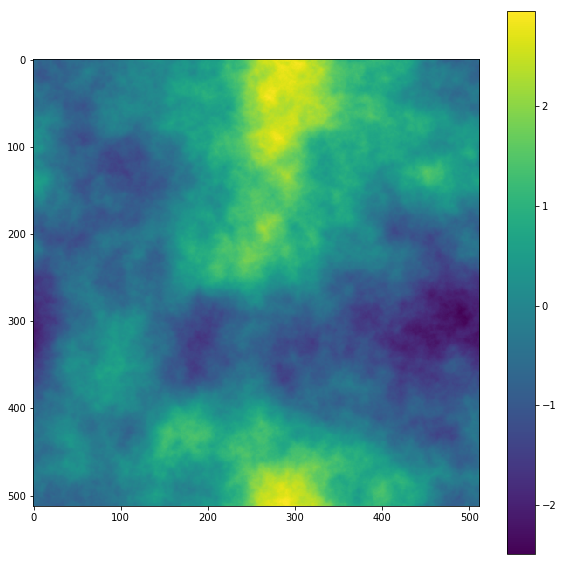

In [15]:
fbm = fbm2d(-3.6, 512,512)

figure(figsize(10,10))
imshow(fbm)
plt.colorbar()

In [16]:
wt, S11a, wav_kfbm, S1afbm, q = fan_trans(fbm, reso=1, q=0, qdyn=False)

Mean fbm = -2.42861286636753e-17
Mean rec = -4.163336342344337e-17
sigma fbm = 0.9999999999999999
sigma rec = 1.3779702484801917
sigma ratio = 1.377970248480192


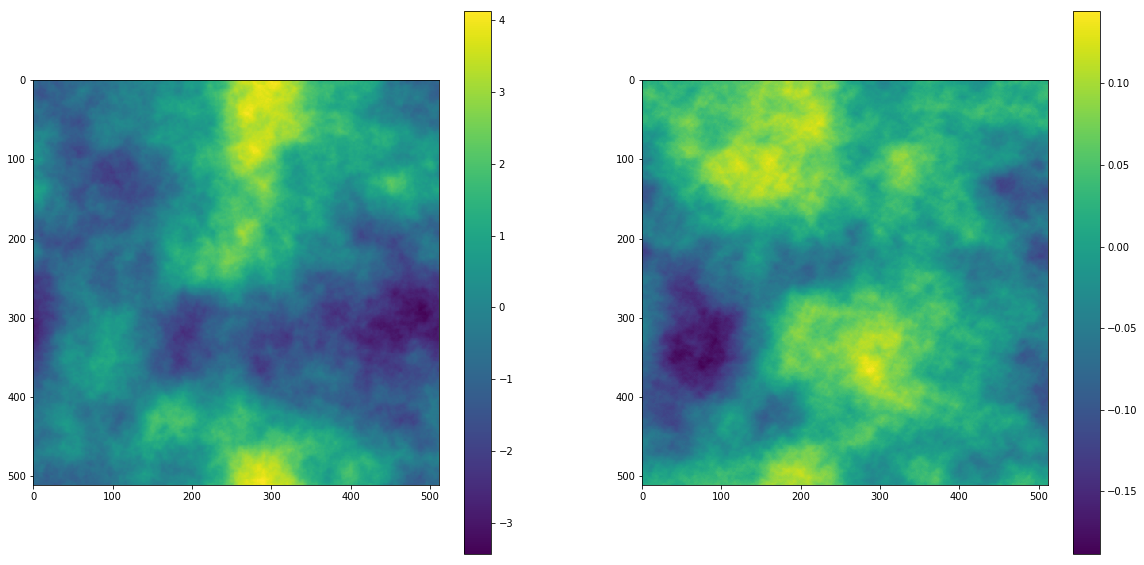

In [17]:
#Reconstruction

rec = np.sum(wt,axis=0).real

print "Mean fbm =", np.mean(fbm)
print "Mean rec =", np.mean(rec)

print "sigma fbm =", np.std(fbm)
print "sigma rec =", np.std(rec)

ratio = np.std(rec)/np.std(fbm)
print "sigma ratio =", ratio

figure(figsize(20,10))

plt.subplot(1,2,1)
imshow(rec)
plt.colorbar()

plt.subplot(1,2,2)
imshow(fbm-rec/ratio)
plt.colorbar()

Fourier power spectrum analysis

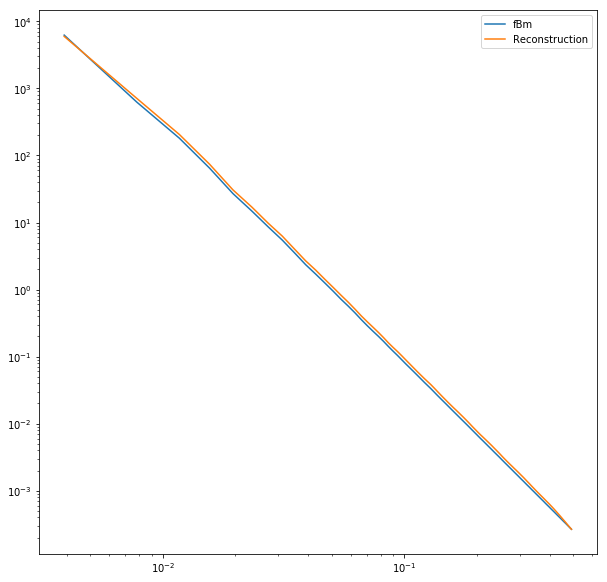

In [7]:
tab_k, spec_fbm = powspec(fbm, reso=1)
tab_k, spec_rec = powspec(rec/np.std(rec), reso=1)

figure(figsize(10,10))
plot(tab_k, spec_fbm, label='fBm')
xscale('log')
yscale('log')
plot(tab_k, spec_rec, label='Reconstruction')
legend()

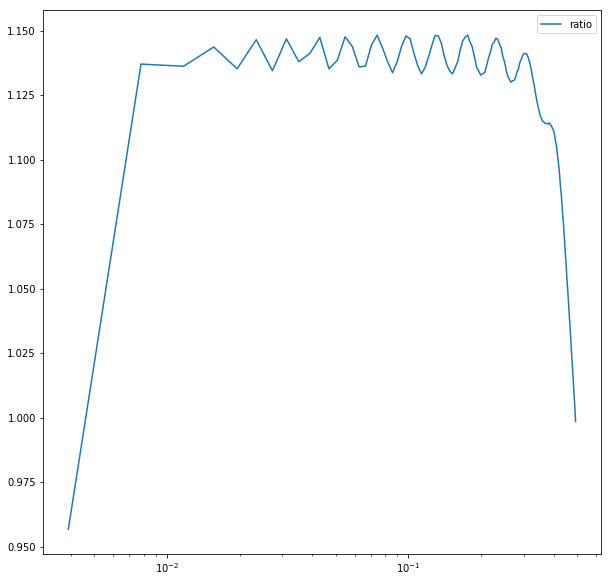

In [8]:
figure(figsize(10,10))
plot(tab_k, spec_rec/spec_fbm, label='ratio')
xscale('log')
#yscale('log')
legend()

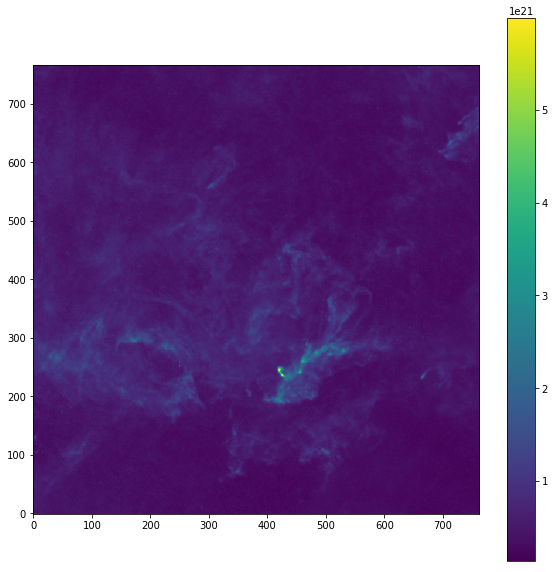

In [13]:
HDU = fits.open('/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_polaris_cdens_rot_rebin_cut.fits')
im = HDU[0].data

figure(figsize(10,10))
imshow(im, origin='below')
plt.colorbar()

In [14]:
im -=np.mean(im)
wtim, S11a, wav_k, S1a, q = fan_trans(im, reso=1, q=0, qdyn=False)

Mean im = 16993.713615007407
Mean imrec = -73199.2731727515
sigma im = 2.2436098518624066e+20
sigma imrec = 3.30184511985242e+20
sigma ratio = 1.4716663492592434


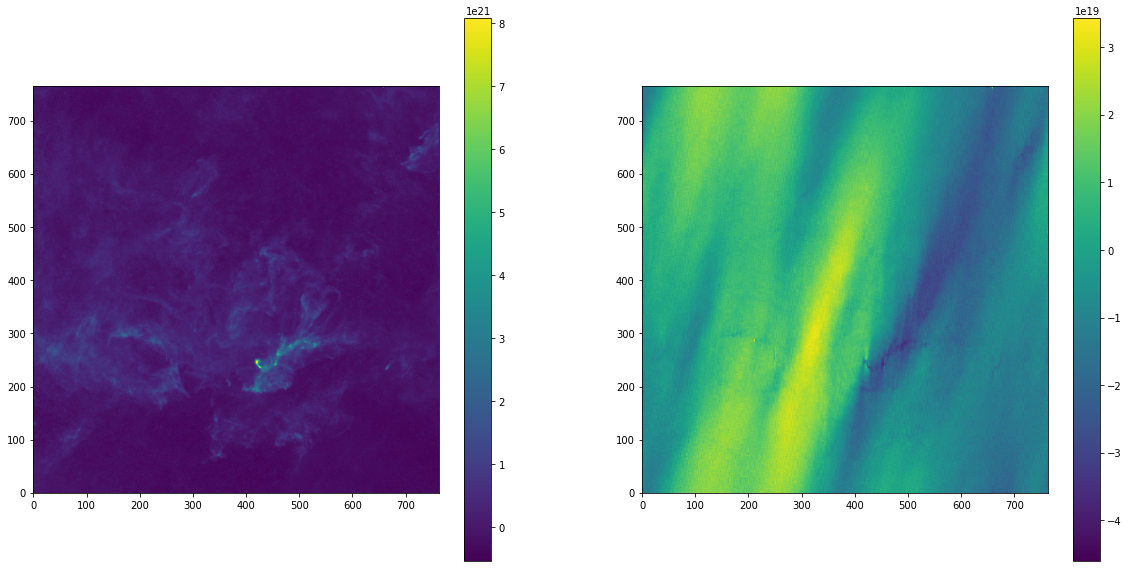

In [68]:
#Reconstruction

imrec = np.sum(wtim,axis=0).real

print "Mean im =", np.mean(im)
print "Mean imrec =", np.mean(imrec)

print "sigma im =", np.std(im)
print "sigma imrec =", np.std(imrec)

ratio = np.std(imrec)/np.std(im)
print "sigma ratio =", ratio

figure(figsize(20,10))

plt.subplot(1,2,1)
imshow(imrec,origin='below')
plt.colorbar()

plt.subplot(1,2,2)
imshow(im-imrec/ratio,origin='below')
plt.colorbar()

#fits.writeto('/Users/robitaij/Desktop/diff.fits',im-imrec/ratio)

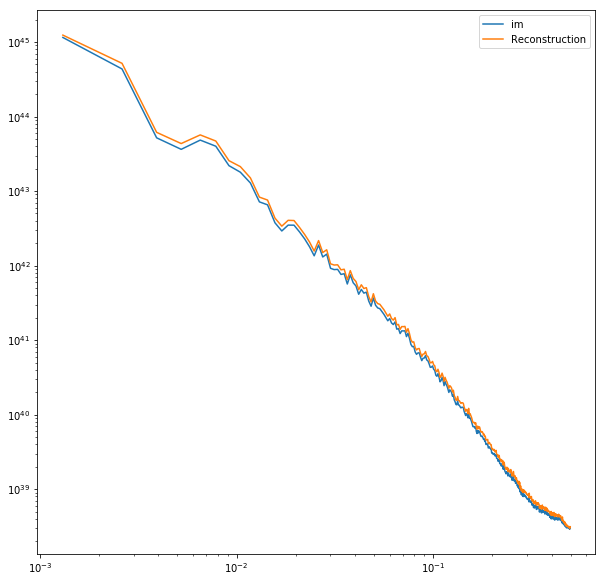

In [76]:
tab_im, spec_im = powspec(im, reso=1)
tab_im, spec_imrec = powspec(imrec/ratio, reso=1)

figure(figsize(10,10))
#subplot(1,2,1)
plot(tab_im, spec_im, label='im')
xscale('log')
yscale('log')
#legend()

#subplot(1,2,2)
plot(tab_im, spec_imrec, label='Reconstruction')
#xscale('log')
#yscale('log')
legend()

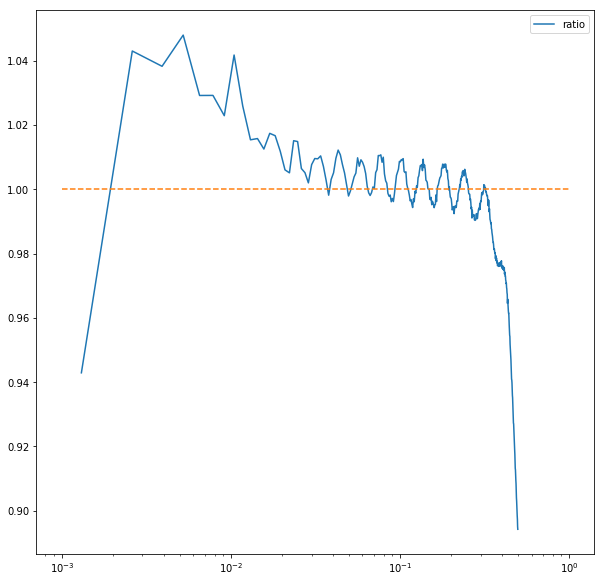

In [72]:
figure(figsize(10,10))
plot(tab_im, spec_imrec/spec_im, label='ratio')
xscale('log')
#yscale('log')
plot([10**-3,10**0],[1.,1.],"--")
legend()

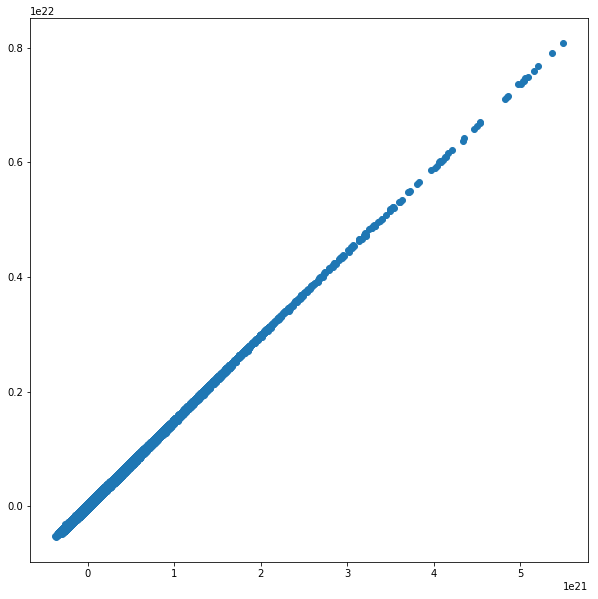

In [74]:
scatter(im,imrec)

In [62]:
dt = (2.*np.sqrt(-2.*np.log(0.75)))/5.336
print dt

0.2843057033136927


In [63]:
print np.sqrt(np.mean(spec_imrec/spec_im))
print np.std(spec_imrec/spec_im)

1.4629089771757195
0.057043868099627734
